<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_3_2_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-315820.622755,-315670.556693,110867.046247,-426537.602939
1,0.0,1.0,22.918788,33.108915,52.423665,-103244.553431,-103126.102063,-54998.352734,-48127.749328
2,0.0,2.0,94.260387,56.081862,24.905140,241090.334419,241275.581807,17273.410679,224002.171129
3,0.0,3.0,65.636759,40.752420,51.472793,117317.225425,117485.087397,-54280.079856,171765.167253
4,0.0,4.0,97.137857,54.229049,63.847257,89200.377676,89425.591839,-16520.873084,105946.464923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-39937.904494,-39800.960549,-64730.822902,24929.862353
249996,999.0,246.0,78.779314,34.012604,87.946333,83857.714677,84068.452927,72068.754759,11999.698168
249997,999.0,247.0,61.652474,82.101807,97.484738,328756.658200,329007.897219,220982.301669,108025.595550
249998,999.0,248.0,46.761180,26.524864,30.500874,61394.343637,61508.130555,-57480.166995,118988.297550


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-315820.622755,-315670.556693,110867.046247,-426537.602939
1,0.0,1.0,22.918788,33.108915,52.423665,-103244.553431,-103126.102063,-54998.352734,-48127.749328
2,0.0,2.0,94.260387,56.081862,24.905140,241090.334419,241275.581807,17273.410679,224002.171129
3,0.0,3.0,65.636759,40.752420,51.472793,117317.225425,117485.087397,-54280.079856,171765.167253
4,0.0,4.0,97.137857,54.229049,63.847257,89200.377676,89425.591839,-16520.873084,105946.464923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-39937.904494,-39800.960549,-64730.822902,24929.862353
249996,999.0,246.0,78.779314,34.012604,87.946333,83857.714677,84068.452927,72068.754759,11999.698168
249997,999.0,247.0,61.652474,82.101807,97.484738,328756.658200,329007.897219,220982.301669,108025.595550
249998,999.0,248.0,46.761180,26.524864,30.500874,61394.343637,61508.130555,-57480.166995,118988.297550


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    32.090180  63.481865  ...  110867.046247 -426537.602939
      1.0    22.918788  33.108915  ...  -54998.352734  -48127.749328
      2.0    94.260387  56.081862  ...   17273.410679  224002.171129
      3.0    65.636759  40.752420  ...  -54280.079856  171765.167253
      4.0    97.137857  54.229049  ...  -16520.873084  105946.464923
...                ...        ...  ...            ...            ...
999.0 245.0  49.646676  50.978722  ...  -64730.822902   24929.862353
      246.0  78.779314  34.012604  ...   72068.754759   11999.698168
      247.0  61.652474  82.101807  ...  220982.301669  108025.595550
      248.0  46.761180  26.524864  ...  -57480.166995  118988.297550
      249.0  60.073753  40.128998  ...  133653.983286  -54709.327962

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    32.090180  63.481865  ...  110867.046247 -426537.602939
      1.0    22.918788  33.108915  ...  -54998.352734  -48127.749328
      2.0    94.260387  56.081862  ...   17273.410679  224002.171129
      3.0    65.636759  40.752420  ...  -54280.079856  171765.167253
      4.0    97.137857  54.229049  ...  -16520.873084  105946.464923
...                ...        ...  ...            ...            ...
999.0 245.0  49.646676  50.978722  ...  -64730.822902   24929.862353
      246.0  78.779314  34.012604  ...   72068.754759   11999.698168
      247.0  61.652474  82.101807  ...  220982.301669  108025.595550
      248.0  46.761180  26.524864  ...  -57480.166995  118988.297550
      249.0  60.073753  40.128998  ...  133653.983286  -54709.327962

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,32.090180,63.481865,44.494017,-315820.622755,-315670.556693,110867.046247,-426537.602939
1,0.0,1.0,22.918788,33.108915,52.423665,-103244.553431,-103126.102063,-54998.352734,-48127.749328
2,0.0,2.0,94.260387,56.081862,24.905140,241090.334419,241275.581807,17273.410679,224002.171129
3,0.0,3.0,65.636759,40.752420,51.472793,117317.225425,117485.087397,-54280.079856,171765.167253
4,0.0,4.0,97.137857,54.229049,63.847257,89200.377676,89425.591839,-16520.873084,105946.464923
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,49.646676,50.978722,26.318548,-39937.904494,-39800.960549,-64730.822902,24929.862353
249996,999.0,246.0,78.779314,34.012604,87.946333,83857.714677,84068.452927,72068.754759,11999.698168
249997,999.0,247.0,61.652474,82.101807,97.484738,328756.658200,329007.897219,220982.301669,108025.595550
249998,999.0,248.0,46.761180,26.524864,30.500874,61394.343637,61508.130555,-57480.166995,118988.297550


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    32.090180  63.481865  ...  110867.046247 -426537.602939
      1.0    22.918788  33.108915  ...  -54998.352734  -48127.749328
      2.0    94.260387  56.081862  ...   17273.410679  224002.171129
      3.0    65.636759  40.752420  ...  -54280.079856  171765.167253
      4.0    97.137857  54.229049  ...  -16520.873084  105946.464923
...                ...        ...  ...            ...            ...
999.0 245.0  49.646676  50.978722  ...  -64730.822902   24929.862353
      246.0  78.779314  34.012604  ...   72068.754759   11999.698168
      247.0  61.652474  82.101807  ...  220982.301669  108025.595550
      248.0  46.761180  26.524864  ...  -57480.166995  118988.297550
      249.0  60.073753  40.128998  ...  133653.983286  -54709.327962

[250000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

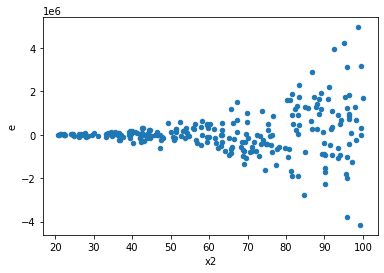

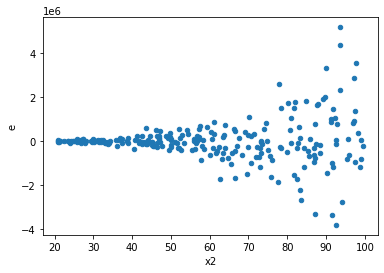

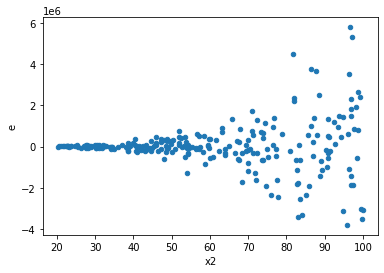

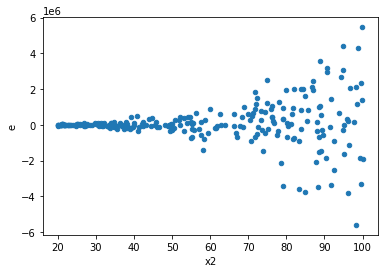

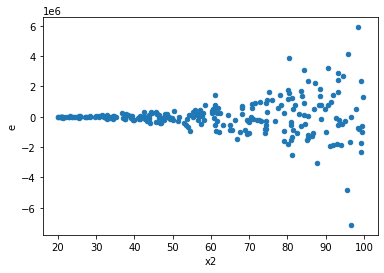

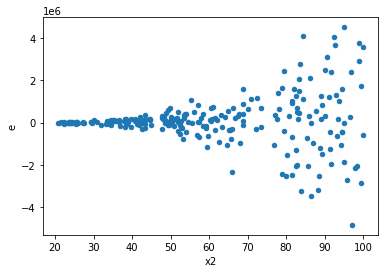

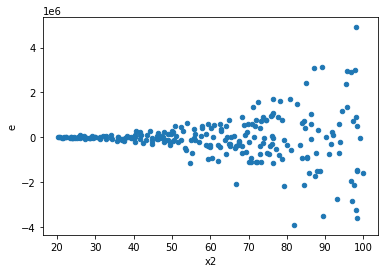

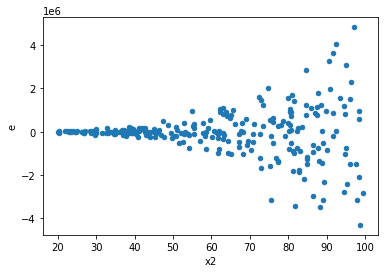

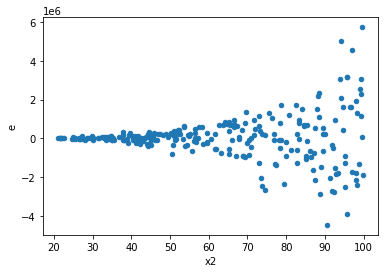

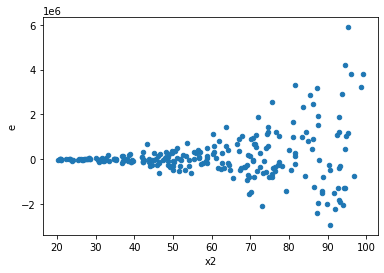

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,97.0,97.0,229494364748727.38,3008991492797.862,2390566299465.91,31343661383.31106,76.26952927518441,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,200758484796420.0,2068346219088.2524,2091234216629.375,21545273115.50263,97.06232106775447,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,331650115842679.5,2068240588769.1377,3454688706694.578,21544172799.678516,160.35374107035238,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,340802373215018.94,1384390310945.5298,3550024720989.781,14420732405.682602,246.17506386782864,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,308132192162194.25,2158437600830.6255,3209710335022.857,22483725008.652348,142.75705354818533,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,327437284675207.75,1955038367931.8752,3410805048700.0806,20364982999.290367,167.48381517524138,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,222618002842762.6,2110305465983.177,2318937529612.1104,21982348603.99143,105.49089050434998,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,290082946342815.6,2320105346642.4272,3021697357737.6626,24167764027.525284,125.03007536386794,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,325238500274321.5,2952031549296.7188,3387901044524.182,30750328638.50749,110.17446624234253,2.220446049250313e-16,0.9999999999999999,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,229494364748727.38,3008991492797.862,2390566299465.91,31343661383.31106,76.26952927518441,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,200758484796420.0,2068346219088.2524,2091234216629.375,21545273115.50263,97.06232106775447,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,331650115842679.5,2068240588769.1377,3454688706694.578,21544172799.678516,160.35374107035238,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,340802373215018.94,1384390310945.5298,3550024720989.781,14420732405.682602,246.17506386782864,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,308132192162194.25,2158437600830.6255,3209710335022.857,22483725008.652348,142.75705354818533,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,327437284675207.75,1955038367931.8752,3410805048700.0806,20364982999.290367,167.48381517524138,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,222618002842762.6,2110305465983.177,2318937529612.1104,21982348603.99143,105.49089050434998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,290082946342815.6,2320105346642.4272,3021697357737.6626,24167764027.525284,125.03007536386794,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,325238500274321.5,2952031549296.7188,3387901044524.182,30750328638.50749,110.17446624234253,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64